<a href="https://colab.research.google.com/github/rahmadyn295/studi-independent_orbit/blob/main/Hand_on_Data_Processing_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# library untuk menyembunyikan pesan warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('patient_dataset.csv')

dataset = df.copy()
dataset.head()

,Name,Gender,Height,Weight,Index
0,Byron Farrell,Male,174.0,96.0,NaN
1,Kent Cotton,Male,189.0,87.0,Normal
2,Angela Skiver,Female,185.0,110.0,Obesity
3,Melisa Bobrow,Female,195.0,104.0,Overweight
4,Jared Chase,Male,149.0,61.0,Overweight


In [3]:
# ukuran dataset
dataset.shape

(518, 5)

In [4]:
# periksa jumlah data duplikat
dataset.duplicated().sum()

14

In [5]:
# hapus data duplikat
dataset.drop_duplicates(inplace=True)
dataset.shape

(504, 5)

In [6]:
# menghapus kolom yang tidak diperlukan
dataset = dataset.iloc[:, 1:]
dataset.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,NaN
1,Male,189.0,87.0,Normal
2,Female,185.0,110.0,Obesity
3,Female,195.0,104.0,Overweight
4,Male,149.0,61.0,Overweight


In [8]:
# jumlah missing value pada tiap kolom
dataset.isnull().sum()

Gender    54
Height    31
Weight    36
Index     40
dtype: int64

In [9]:
gender_mode = dataset['Gender'].mode()
height_median = dataset['Height'].median()
weight_median = dataset['Weight'].median()
index_mode = dataset['Index'].mode()

print('Modus kolom Gender  : ', gender_mode[0])
print('Median kolom Height : ', height_median)
print('Median kolom Weight : ', weight_median)
print('Modus kolom Index   : ', index_mode[0])

Modus kolom Gender  :  Male
Median kolom Height :  171.0
Median kolom Weight :  105.0
Modus kolom Index   :  Extreme Obesity


In [10]:
# imputasi secara manual pada keempat kolom menggunakan function fillna
dataset['Gender'].fillna(gender_mode[0], inplace=True)
dataset['Height'].fillna(height_median, inplace=True)
dataset['Weight'].fillna(weight_median, inplace=True)
dataset['Index'].fillna(index_mode[0], inplace=True)

dataset.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

Handling outlier

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
# meringkas dataset menggunakan descriptive statistics
dataset.describe(include='all')

,Gender,Height,Weight,Index
count,504,504.000000,504.000000,504
unique,2,NaN,NaN,6
top,Male,NaN,NaN,Extreme Obesity
freq,282,NaN,NaN,223
mean,NaN,170.509921,105.813492,NaN
std,NaN,17.728567,31.253229,NaN
min,NaN,140.000000,5.000000,NaN
25%,NaN,157.000000,82.000000,NaN
50%,NaN,171.000000,105.000000,NaN
75%,NaN,183.000000,132.250000,NaN


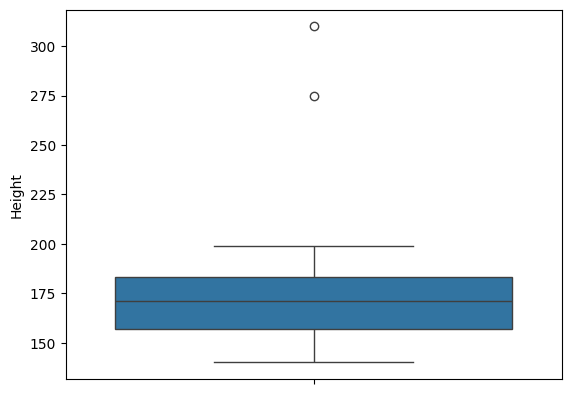

In [13]:
# memeriksa outlier pada kolom Height
sns.boxplot(dataset['Height'])
plt.show()

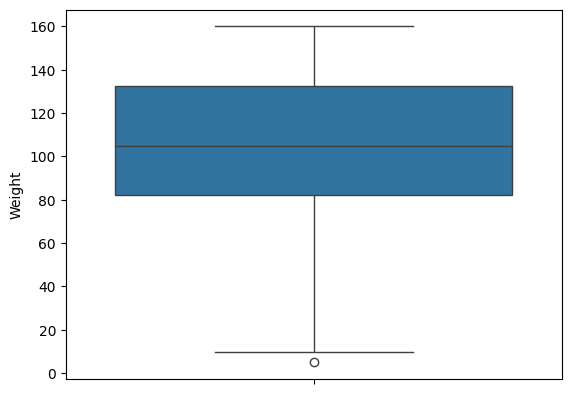

In [14]:
# memeriksa outlier pada kolom Weight
sns.boxplot(dataset['Weight'])
plt.show()

In [15]:
kolom_numerik = ['Height', 'Weight']

# menghapus outliers dengan meanfaatkan Z-Score
# jika suatu baris memiliki Z-Score > 3, maka baris tersebut dihapus karena memiliki outlier
dataset = dataset[(np.abs(stats.zscore(dataset[kolom_numerik])) < 3).all(axis=1)]

# ukuran dataset
dataset.shape

(500, 4)

labeling

In [16]:
dataset.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,Extreme Obesity
1,Male,189.0,87.0,Normal
2,Female,185.0,110.0,Obesity
3,Female,195.0,104.0,Overweight
4,Male,149.0,61.0,Overweight


In [17]:
print(dataset['Gender'].unique())
print(dataset['Index'].unique())

['Male' 'Female']
['Extreme Obesity' 'Normal' 'Obesity' 'Overweight' 'Weak' 'Extremely Weak']


In [18]:
# label encoding secara manual dengan memanfaatkan fuction map()

# nominal
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})

# ordinal
dataset['Index'] = dataset['Index'].map({'Extremely Weak':0,
                                         'Weak':1,
                                         'Normal':2,
                                         'Overweight':3,
                                         'Obesity':4,
                                         'Extreme Obesity':5})

In [19]:
print(dataset['Gender'].unique())
print(dataset['Index'].unique())

[0 1]
[5 2 4 3 1 0]


In [20]:
dataset.head()

,Gender,Height,Weight,Index
0,0,174.0,96.0,5
1,0,189.0,87.0,2
2,1,185.0,110.0,4
3,1,195.0,104.0,3
4,0,149.0,61.0,3


modelling


In [21]:
X = dataset.drop(labels='Index', axis=1).values
y = dataset['Index'].values

In [22]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 12,  20,  59,  63, 123, 223]))

In [24]:
#handling imbalance
from imblearn.over_sampling import SMOTENC

In [25]:
sm = SMOTENC(random_state=42, categorical_features=[0]) # feature ke nol (kolom Gender) merupakan feature kategorikal
X_res, y_res = sm.fit_resample(X, y)

In [26]:
np.unique(y_res, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([223, 223, 223, 223, 223, 223]))

In [27]:
# ukuran feature dan label setelah dilakukan oversampling
print(X_res.shape)
print(y_res.shape)

(1338, 3)
(1338,)


Split Train Set & Test Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

print('Train set size : ', X_train.shape, y_train.shape)
print('Test set size  : ', X_test.shape, y_test.shape)

Train set size :  (936, 3) (936,)
Test set size  :  (402, 3) (402,)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

# Standardization Feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [34]:
from sklearn.tree import DecisionTreeClassifier

# training model Decision Tree
hyperparameters = {'max_depth': list(range(2, 11)),
                   'max_leaf_nodes': list(range(2, 11))}

model_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), hyperparameters, cv=8, refit=True)

model_dt.fit(X_train, y_train)
print('Setting model Decision Tree terbaik :', model_dt.best_params_)

Setting model Decision Tree terbaik : {'max_depth': 6, 'max_leaf_nodes': 10}


In [35]:
y_pred = model_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.71      0.69      0.70        67
           2       0.47      0.67      0.56        67
           3       0.67      0.52      0.59        67
           4       0.64      0.70      0.67        67
           5       0.85      0.69      0.76        67

    accuracy                           0.70       402
   macro avg       0.72      0.70      0.70       402
weighted avg       0.72      0.70      0.70       402



In [37]:
from sklearn.neighbors import KNeighborsClassifier

# training model k-NN
hyperparameters = {'n_neighbors': list(range(2, 21))}

model_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=8, refit=True)

model_knn.fit(X_train_scaled, y_train)
print('Setting model k-NN terbaik :', model_knn.best_params_)

Setting model k-NN terbaik : {'n_neighbors': 3}


In [38]:
y_pred = model_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.86      0.91      0.88        67
           2       0.95      0.79      0.86        67
           3       0.73      0.87      0.79        67
           4       0.80      0.82      0.81        67
           5       0.86      0.76      0.81        67

    accuracy                           0.85       402
   macro avg       0.86      0.85      0.85       402
weighted avg       0.86      0.85      0.85       402



In [40]:
from sklearn.svm import SVC

# training model SVM
hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
                   'kernel': ['rbf', 'sigmoid'],
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model_svm = GridSearchCV(SVC(), hyperparameters, cv=8, refit=True)

model_svm.fit(X_train_scaled, y_train)
print('Setting model SVM terbaik :', model_svm.best_params_)

Setting model SVM terbaik : {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [41]:
y_pred = model_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.85      0.91      0.88        67
           2       0.95      0.82      0.88        67
           3       0.74      0.85      0.79        67
           4       0.81      0.85      0.83        67
           5       0.88      0.76      0.82        67

    accuracy                           0.86       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.86      0.86      0.86       402



In [43]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [44]:
y_pred = model_nb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        67
           1       0.45      0.91      0.60        67
           2       0.52      0.51      0.52        67
           3       0.50      0.22      0.31        67
           4       0.58      0.48      0.52        67
           5       0.83      0.72      0.77        67

    accuracy                           0.60       402
   macro avg       0.63      0.60      0.59       402
weighted avg       0.63      0.60      0.59       402



In [45]:
best_model = SVC(C=100, gamma=1, kernel='rbf')
best_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1)

In [46]:
# input data baru
jenis_kelamin = 1 #@param [0, 1]{type:"raw"}
tinggi_badan = 150#@param {type:"number"}
berat_badan = 48#@param {type:"number"}

# data baru yang diinput harus di-standardization terlebih dahulu
data_baru = [[jenis_kelamin, tinggi_badan, berat_badan]]
data_baru = scaler.transform(data_baru)

# prediksi data baru, yang sudah di-standardization, menggunakan model SVM terbaik
hasil_prediksi = best_model.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

print('Hasil prediksi index Anda adalah ', end='')
if hasil_prediksi == 0:
  print('Extremely Weak')
elif hasil_prediksi == 1:
  print('Weak')
elif hasil_prediksi == 2:
  print('Normal')
elif hasil_prediksi == 3:
  print('Overweight')
elif hasil_prediksi == 4:
  print('Obesity')
else:
  print('Extremely Obesity')

Hasil prediksi index Anda adalah Normal


In [47]:
import pickle

In [48]:
# menyimpan scaler object (preprocessing StandardScaler), scaler object dibutuhkan untuk men-standardization data baru
pickle.dump(scaler, open('scaler_DPA.pkl', 'wb'))

# menyimpan model terbaik
pickle.dump(best_model, open('model_DPA.pkl', 'wb'))